# Obtención del filtro para EMG  
Condiciones:
* Frecuencias de interés: 20 - 400 Hz
* Frecuencia de sampleo: 1000 Hz

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import freqz
import control as ctrl

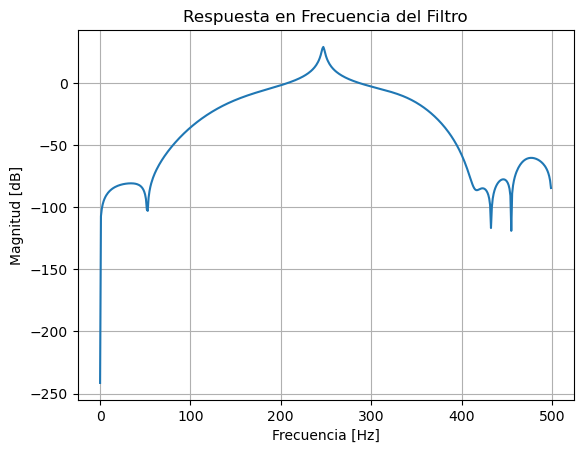

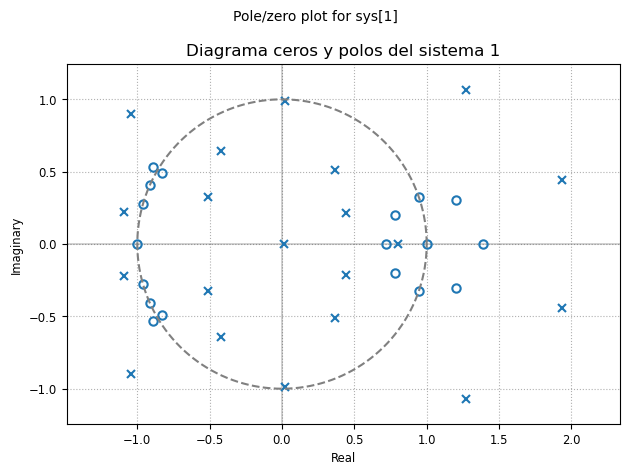

In [24]:

#coeficientes para filtro elíptico
b = [0.1944,-0.1518,-1.38,0.7234,4.807,-1.465,-10.37,1.352,15.01,5.329**(-15),-15.01,-1.352,10.37,1.465,-4.807,-0.7234,1.38,0.1518,-0.1944]
a = [1,-2.766,-0.9256,6.567,3.517,-13.9,-3.951,14.94,7.425,14.94,7.425,-14.18,-5.501,-.234,4.735,-3.888,-1.389,0.788,0.6635,-0.4267,0.006405]
fs = 1000 #hz

obtener_rpta_freq(b,a,fs)
obtener_zer_polos(b,a,"Diagrama ceros y polos del sistema 1")

muestras,amplitud=lectura("bicep.txt")



TypeError: stem() got an unexpected keyword argument 'use_line_collection'

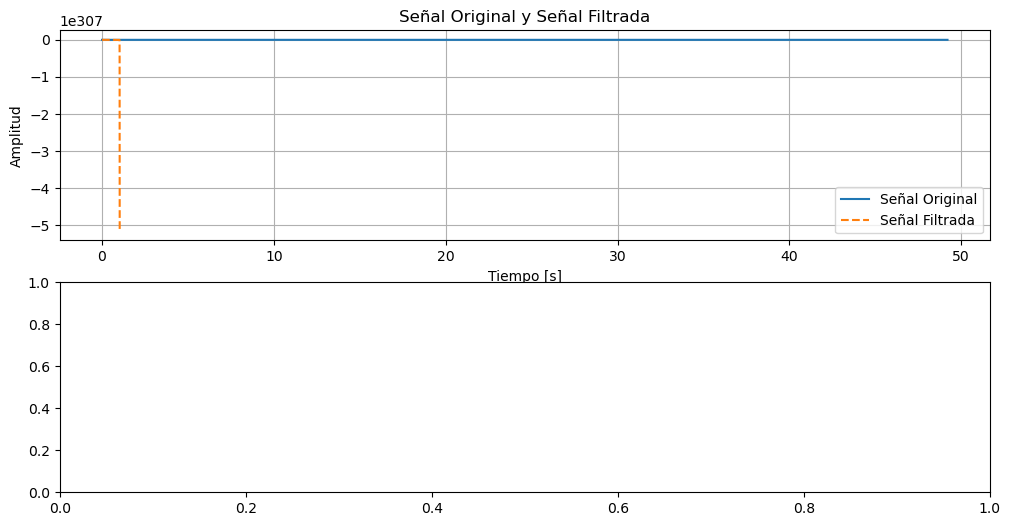

In [27]:
filtrado, rpta_impulso = aplicar_filter(b,a,amplitud,fs)


In [18]:
def obtener_rpta_freq(numerador,denominador,fs):
    w, h = freqz(b, a)
    fs = 1000
    # Convertir la frecuencia a Hz
    frequencies = w * fs / (2 * np.pi)

    # Grafica la respuesta en frecuencia
    plt.plot(frequencies, 20 * np.log10(abs(h)))
    plt.title('Respuesta en Frecuencia del Filtro')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    plt.grid()
    plt.show()

def obtener_zer_polos(numerador, denominador,titulo="Diagrama de zeros y polos"):
    ctrl.pole_zero_plot(filtro)
    plt.title(titulo)
    plt.grid(ls=":")

    radius = 1
    center = (0, 0)

    # Generar puntos para el círculo
    theta = np.linspace(0, 2 * np.pi, 10000)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)

    # Graficar el círculo
    plt.plot(x, y, ls="--", color="gray")

    plt.tight_layout()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, impulse

def aplicar_filter(numerador, denominador, signal, fs=1000):
    # Filtrar la señal de entrada
    senal_filtrada = lfilter(numerador, denominador, signal)

    # Calcular la respuesta al impulso
    impulse_signal = np.zeros(len(signal))
    impulse_signal[0] = 1  # Impulso unitario
    impulse_response = lfilter(numerador, denominador, impulse_signal)

    # Graficar la señal original y la señal filtrada
    t = np.arange(len(signal)) / fs 
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, label='Señal Original')
    plt.plot(t, senal_filtrada, label='Señal Filtrada', linestyle='dashed')
    plt.title('Señal Original y Señal Filtrada')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid()

    # Graficar la respuesta al impulso
    plt.subplot(2, 1, 2)
    t_impulse = np.arange(len(impulse_response)) / fs
    plt.stem(t_impulse, impulse_response, use_line_collection=True)
    plt.title('Respuesta al Impulso del Filtro')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid()

    plt.tight_layout()
    plt.show()

    return senal_filtrada, impulse_response

def lectura(nombre):
    # Abrir el archivo de texto
    with open(nombre, "r") as f:
        # Saltar las tres primeras líneas
        next(f)
        next(f)
        next(f)
        
        # Leer todas las líneas restantes
        all_data = f.readlines()   
    
    # Procesar cada línea, dividiendo por tabulaciones
    all_data = [line.strip().split('\t') for line in all_data]
    
    # Extraer la primera columna (muestra)
    sample = [int(row[0]) for row in all_data]  # Primera columna

    # Crear una secuencia de números para la muestra (opcional, según tu lógica)
    sample = np.arange(0, len(sample))  # Reemplaza los valores por una secuencia 0, 1, 2, ..., n
    
    # Extraer la sexta columna (amplitud)
    amplitude = [int(row[5]) for row in all_data]  # Sexta columna (índice 5)
    amplitude = np.array(amplitude)
    return sample, amplitude  # Devolver los valores de la muestra y amplitud

def transf_fourier(signal, fs):
    # Longitud de la señal
    N = len(signal)
    
    # Aplicar la FFT
    fft_valores = np.fft.fft(signal)
    
    # Obtener las frecuencias correspondientes
    frecuencias = np.fft.fftfreq(N, 1/fs)
    
    # Tomar solo la mitad del espectro (parte positiva)
    positive_frequencies = frecuencias[:N // 2]
    positive_magnitudes = np.abs(fft_valores[:N // 2]) * 2 / N  # Magnitud normalizada
    
    # Graficar el espectro de frecuencias
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitudes)
    plt.title('Espectro de Frecuencia (FFT)')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()

    return positive_frequencies, positive_magnitudes

